# UTS PEMBELAJARAN MESIN 2024 (Klasifikasi Neural Network (NN) Pada Data Citra)
***
## Anggota Kelompok
### Diantoro Kadarman   / 2241720084
### Febby Mathelda S M  / 2241720067
### Habibatul Mustofa   / 2241720211
### Maya Melanesia R    / 2241720237
***
# Intro

Pada UTS ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Casia-Webface (Data dapat diunduh pada Kaggle).
Anda diperbolehkan melakukan eksplorasi terhadap:
1. Metode pra pengolahan
2. Pemilihan fitur
3. Arsitektur ANN
4. Fungsi Aktiviasi
5. Metric Evaluasi 

# Preparation & Import Library

In [30]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Load Data

In [31]:
path = "../../../Data/casia-webface"

# Load Data
files = os.listdir(path)

print("Path to dataset files:", path)
print("Files in dataset folder:", files) # Print to check content

Path to dataset files: ../../../Data/casia-webface
Files in dataset folder: ['000000', '000001', '000002', '000003', '000004', '000005', '000006', '000007', '000008', '000009', '000010', '000011', '000012', '000013', '000014', '000015', '000016', '000017', '000018', '000019', '000020', '000021', '000022', '000023', '000024', '000025', '000026', '000027', '000028', '000029', '000030', '000031', '000032', '000033', '000034', '000035', '000036', '000037', '000038', '000039', '000040', '000041', '000042', '000043', '000044', '000045', '000046', '000047', '000048', '000049', '000050', '000051', '000052', '000053', '000054', '000055', '000056', '000057', '000058', '000059', '000060', '000061', '000062', '000063', '000064', '000065', '000066', '000067', '000068', '000069', '000070', '000071', '000072', '000073', '000074', '000075', '000076', '000077', '000078', '000079', '000080', '000081', '000082', '000083', '000084', '000085', '000086', '000087', '000088', '000089', '000090', '000091', '00

Found 490623 images.


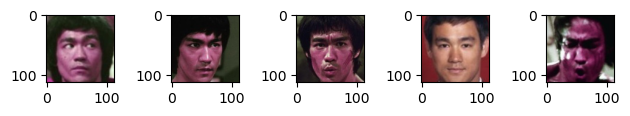

In [32]:
path = "../../../Data/casia-webface"

# Find all image files in the dataset (assuming images are in .jpg format)
image_files = glob.glob(os.path.join(path, "**/*.jpg"), recursive=True)

# Check if any images were found
if image_files:
    print(f"Found {len(image_files)} images.")

    # Display the first 5 images
    for i, image_file in enumerate(image_files[:5]):
        img = Image.open(image_file)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.tight_layout()
        # plt.axis('off')

    plt.show()
else:
    print("No images found in the dataset.")

# Preprocessing

In [33]:
# Inisialisasi list kosong untuk data train dan test
train_files = []
test_files = []

# Perulangan pada array data
for class_dir, image_files in class_files.items():

    # Bagi data train dan test untuk setiap kelas
    train, test = train_test_split(image_files, test_size=0.2, random_state=42)

    # Masukkan hasil pembagian data pada list
    train_files.extend(train)
    test_files.extend(test)

print(f"Number of training files: {len(train_files)}")
print(f"Number of testing files: {len(test_files)}")

Number of training files: 388297
Number of testing files: 102326


In [34]:
# Fungsi untuk pra-pengolahan data
def preprocess_data(files):
    X, y = [], []
    for file_path in files:
        try:
            img = Image.open(file_path)
            
            # Konversi gambar ke mode RGB jika bukan RGB
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize gambar ke 64x64 dan konversi ke array
            img = img.resize((64, 64))
            img_array = np.array(img) / 255.0  # Normalisasi
            
            # Menambahkan citra dan labelnya ke daftar
            X.append(img_array)
            
            # Mendapatkan nama kelas dari folder
            class_label = os.path.basename(os.path.dirname(file_path))
            y.append(class_label)
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")

    return np.array(X), np.array(y)

In [ ]:
data_path = '../../../Data/casia-webface' 
all_files = glob.glob(os.path.join(data_path, '*/*.jpg'))

# Membagi data menjadi training dan testing
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Melakukan pra-pengolahan data
X_train, y_train = preprocess_data(train_files)
X_test, y_test = preprocess_data(test_files)

# Encode label ke bentuk numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Konversi label ke categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

KeyboardInterrupt: 

Contoh one-hot encoding


```
[1, 0, 0]  # untuk 0
[0, 1, 0]  # untuk 1
[0, 0, 1]  # untuk 2
```


# Build Model

In [ ]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluation

In [ ]:
# Evaluasi model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))